# Load the dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep = "\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [4]:
x_train = df[['x1', 'x2']].values
y_train = df['label'].values

In [5]:
import torch

In [6]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [7]:
x_train

tensor([[ 0.7700, -1.1400],
        [-0.3300,  1.4400],
        [ 0.9100, -3.0700],
        [-0.3700, -1.9100],
        [-0.6300, -1.5300],
        [ 0.3900, -1.9900],
        [-0.4900, -2.7400],
        [-0.6800, -1.5200],
        [-0.1000, -3.4300],
        [-0.0500, -1.9500],
        [ 3.8800,  0.6500],
        [ 0.7300,  2.9700],
        [ 0.8300,  3.9400],
        [ 1.5900,  1.2500],
        [ 1.1400,  3.9100],
        [ 1.7300,  2.8000],
        [ 1.3100,  1.8500],
        [ 1.5600,  3.8500],
        [ 1.2300,  2.5400],
        [ 1.3300,  2.0300]], dtype=torch.float64)

In [8]:
x_train = x_train.to(torch.float32)

In [9]:
x_train.shape

torch.Size([20, 2])

In [10]:
y_train

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
y_train.shape

torch.Size([20])

In [12]:
import numpy as np

In [13]:
np.bincount(y_train)

array([10, 10])

# Visualizing the Dataset

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

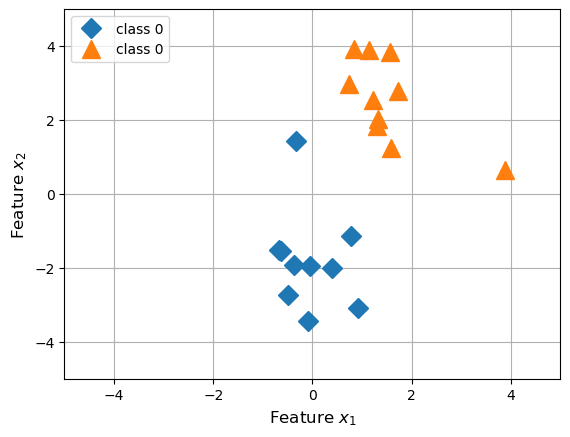

In [15]:
plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle = '',
    label = 'class 0'
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = '^',
    markersize = 13,
    linestyle = '',
    label = 'class 0'
)

plt.legend(loc = 2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize = 12)
plt.ylabel("Feature $x_2$", fontsize = 12)

plt.grid()
plt.show()

In [16]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features)
        self.bias = torch.tensor(0.)

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) +self.bias

        if weighted_sum_z > 0:
            prediction = torch.tensor(1.)
        else:
            prediction = torch.tensor(0.)

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        self.weights += error * x

        return error

In [18]:
ppn = Perceptron(num_features = 2)

In [19]:
print("Model parameters:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)

Model parameters:
  Weights: tensor([0., 0.])
  Bias: tensor(0.)


In [20]:
ppn.bias

tensor(0.)